# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [1]:
import sys 
import os
sys.path.append('../../') 
from aqua import Reader
import cftime

Open a small cluster to speed up the operations with dask

In [27]:
# from dask.distributed import LocalCluster, Client, progress
# processes = False
# nworker = 2
# ncpu = 2
# threads = ncpu // nworker
# print(f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}, processes: {processes}")
# client = Client(processes=processes,
#  threads_per_worker=threads,
#  n_workers=nworker,
#  memory_limit='64GB'
#  )

Number of CPUs: 2, number of threads: 1, number of workers: 2, processes: False


Start loading the ecmean functions, define the years of the experiments and experiment name

In [1]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices

model = 'IFS'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'interface_IFS+NEMO-intake.yml'
config = 'config_intake.yml'

reader = Reader(model=model, exp=exp, source="lra_r100", configdir = "../../config")
data = reader.retrieve(fix=False)
data


NameError: name 'Reader' is not defined

In [ ]:
from ecmean.libs.units import units_converter
units_converter(data.tsr.units, 'W/m2')

INFO:root:1.0 second
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


(0.0, 1.0)

In [13]:
units_converter(data.tp.units, 'm/s')

INFO:root:1.0 second
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


(0.0, 1.0)

Create the LSM and write to disk

In [9]:
#mask = data['lsm'][0,:]
#mask.to_netcdf(os.path.join('/home/b/b382076/work/ecmean/data/', f'mask_{model}-{exp}.nc'))


# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/NEMO and working directly on the 1x1 files

In [8]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'info', cfield = data)

INFO:root:/home/b/b382076/AQUA/diagnostics/ecmean/ECmean4/ecmean
INFO:root:Namespace(exp='tco2559-ng5', year1=2020, year2=2020, config='config_intake.yml', loglevel='info', numproc=1, interface='interface_IFS+NEMO-intake.yml', model=None, ensemble='r1i1p1f1', silent=None, trend=None, line=None, output=None, cfield=<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-31 2020-02-29 ... 2021-01-31
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    lsm      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.n

Average net_toa 2851863.6933742263


INFO:root:tas is a derived var, assuming unit as the first of its term
INFO:root:tas
INFO:root:K ---> K
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average tas 283.12296585542697


INFO:root:psl is a derived var, assuming unit as the first of its term
INFO:root:psl
INFO:root:Pa ---> Pa
INFO:root:1.0 dimensionless
INFO:root:Offset is 0.0
INFO:root:Factor is 1.0


Average psl 101208.13771790123


INFO:root:siconc is a derived var, assuming unit as the first of its term
INFO:root:siconc
INFO:root:frac ---> Mm^2
INFO:root:1e-12 fraction
INFO:root:Unit conversion required...
INFO:root:Offset is 0.0
INFO:root:Factor is 1e-12


Average siconc 0.08412893605385854
Done in 0.4160 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_tco2559-ng5_IFS+NEMO_r1i1p1f1_2020_2020.txt


Open the obtained txt file

In [4]:
table_name = '/work/bb1153/b382076/ecmean/tables/global_mean_' + exp + '_IFS+NEMO_r1i1p1f1_' + str(year1) + '_' + str(year2) + '.txt'
f = open(table_name, 'r')
file_contents = f.read()
print(file_contents)
f.close()

| Variable     | Longname                    | Units   |         IFS+NEMO |          Obs. | Dataset    | Years     |
|--------------+-----------------------------+---------+------------------+---------------+------------+-----------|
| tas          | 2m Temperature              | K       |    288.423       |    287.497    | ERA5       | 1990-2019 |
| psl          | MSLP                        | Pa      | 101136           | 101142        | ERA5       | 1990-2019 |
| pr           | Total precipitation         | mm/day  |      3.028       |      2.92552  | ERA5       | 1990-2019 |
| pme          | Precip. minus evap.         | mm/day  |      0.00383825  |      0        |            |           |
| cll          | Low cloud cover             |         |      0.355301    |      0.36627  | ERA5       | 1990-2019 |
| clm          | Medium cloud cover          |         |      0.239522    |      0.247956 | ERA5       | 1990-2019 |
| clh          | High cloud cover            |         |      0.

## Performance indices
Now try with Performance Indices

In [5]:
performance_indices(exp, year1, year2, numproc = numproc, config = 'config.yml', 
            interface = interface)

Detecting regular or curvilinear grid, using bilinear!


/work/bb1153/b382076/mambaforge/envs/ECmean4/lib/python3.10/site-packages/xarray/core/dataarray.py:866: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Preproc in 5.1415 seconds
PI for Global ALL ta 18.604
PI for Global DJF ta 7.608
PI for Global JJA ta 19.414
PI for Global ALL ua 4.218
PI for Global DJF ua 2.366
PI for Global JJA ua 5.265
PI for Global ALL va 3.722
PI for Global DJF va 2.007
PI for Global JJA va 4.671
PI for Global ALL hus 14.121
PI for Global DJF hus 14.503
PI for Global JJA hus 13.469
PI for Global ALL tas 40.206
PI for Global DJF tas 18.789
PI for Global JJA tas 37.246
PI for Global ALL pr 6.708
PI for Global DJF pr 4.596
PI for Global JJA pr 6.513
PI for Global ALL psl 3.35
PI for Global DJF psl 1.616
PI for Global JJA psl 2.961
PI for Global ALL tauu 5.261
PI for Global DJF tauu 3.05
PI for Global JJA tauu 4.258
PI for Global ALL tauv 4.276
PI for Global DJF tauv 3.724
PI for Global JJA tauv 4.021
PI for Global ALL tos 12.803
PI for Global DJF tos 7.753
PI for Global JJA tos 10.6
PI for Global ALL siconc 4.886
PI for Global DJF siconc 2.077
PI for Global JJA siconc 11.451
Done in 6.2011 seconds with 1 processors

Performance indices produces a PDF file showing the PI relative to CMIP6 models. This cannot be easily imported within the jupyter workflow so that we try some trick to load it using external packages (as wand)

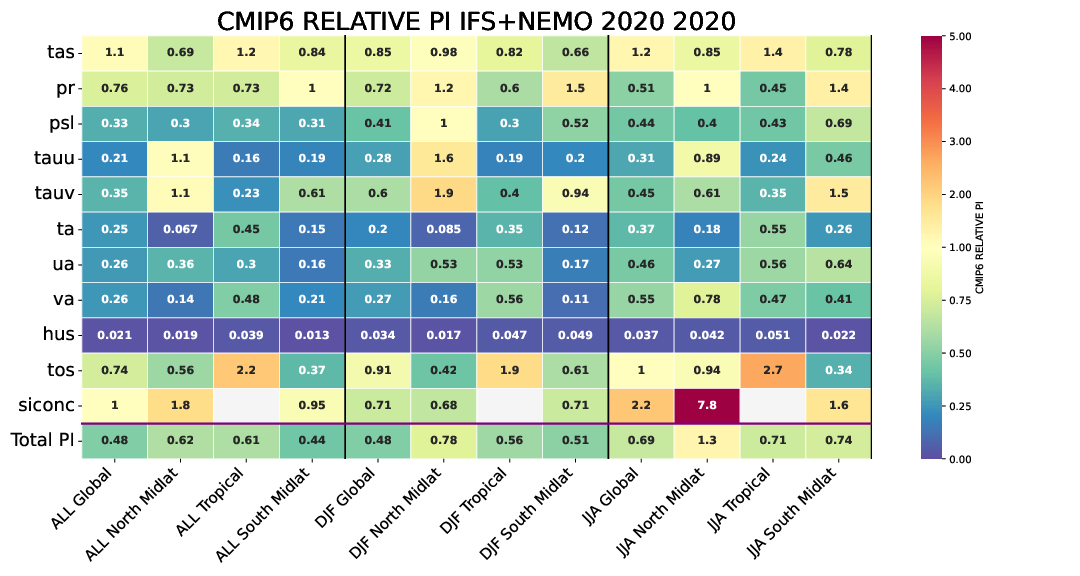

In [6]:
from wand.image import Image as WImage
img = WImage(filename='/work/bb1153/b382076/ecmean/figures/PI4_EC23_4km_IFS+NEMO_r1i1p1f1_2020_2020.pdf')
img